In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/epoch/model.cpkt-50-63750', '')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v.fixtext/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.bak/epoch/model.cpkt-10-12750', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model.v0/bow.basic/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')
flags.DEFINE_bool('feed_single_', True, '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, max_words=50)
  #print('text_ids', text_ids)
  
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #scores = predictor.inference('text_words_emb_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    #score = predictor.inference(['text_emb_sim'], 
    score = predictor.inference(['text_sim'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids],
                                      'bow/main/text2:0': [text2_ids]
                                      })
    print(score[0][0])
    return score[0][0]

  #print('words', words)
  argmax_encode = predictor.inference(['words_importance'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids]
                                      })
  print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]
  argmax_encode = [max(x, 0) for x in argmax_encode]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, append_start=False, append_end=False)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v.fixtext/model.ckpt-18.8-24000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v.fixtext/model.ckpt-18.8-24000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v.fixtext/model.ckpt-18.8-24000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.w2v.fixtext/model.ckpt-18.8-24000


In [7]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [8]:
top_words('高铁')
top_words('美女')

铁:0.884136 高:0.687636 动车:0.541694 比重:0.522787 铜棒:0.500344 乘务:0.484834 waki:0.471476 拍仪:0.454987 孔隙:0.431579 钙镁:0.431344 端:0.430882 创高:0.423560 剥:0.419805 加2:0.417035 小丸子:0.411241 铁建:0.410151 麦斯:0.409879 弊:0.405584 抢点:0.404141 垛:0.404108 云城:0.401759 惯:0.398070 派发:0.398015 威马:0.397906 细度:0.397003 ued:0.394313 热值:0.393590 适于:0.393539 13805194935:0.392488 通票:0.391947 軒:0.391641 dse:0.391250 安顺:0.390966 首府:0.389421 双高:0.389180 华迪克:0.387783 米酷:0.385584 箍筋:0.385344 钨:0.385211 lkk:0.384407 涉:0.384277 恒兴:0.383700 炉温:0.383472 丙纶:0.379798 千斤顶:0.378784 次货:0.377390 裁断:0.376986 光洁:0.376275 亚特:0.376149 有范:0.376055 衡量:0.375089 惠达:0.374566 铜板:0.374172 hongju:0.373910 遥感:0.373613 列车:0.372125 灰钙粉:0.371903 加人:0.371832 想飞:0.371313 升至:0.371199 热解:0.369784 贵重:0.369775 砺:0.369652 扁:0.368110 磁选:0.368099 跳水:0.367929 斗剧:0.367381 677:0.366531 麦卡仑:0.366021 吹膜:0.365715 微量:0.365164 端庄:0.364872 按键:0.364267 勘查:0.363531 孔径:0.363268 197:0.362768 ubnt:0.362570 涡流:0.362158 颜料:0.362060 提案:0.362035 70000:0.361982 容纳:0.36190

In [9]:
top_words('墨镜')

墨镜:1.000000 古风:0.431222 狙:0.398715 皮靴:0.395695 副:0.392026 上身:0.387780 色斑:0.386052 档次:0.377518 想说:0.376983 水嫩:0.376152 黄皮:0.375803 麽:0.375379 衬托:0.372326 棒球:0.371512 地气:0.368291 小气:0.367435 瑞腾:0.360618 受潮:0.357558 稳重:0.357057 慌张:0.355663 谨记:0.354930 越好:0.354845 鞋都:0.354797 挺胸:0.354279 浓密:0.353822 盖子:0.353618 3388:0.353334 神教:0.353285 长腿:0.352044 怕冷:0.350274 稀少:0.349962 共存:0.348774 多几:0.348570 解脱:0.348559 昂首:0.348189 人手:0.346365 下子:0.345017 粉底:0.343555 鱼儿:0.343096 纤薄:0.342510 刀锋:0.342272 寡:0.341832 凰:0.341674 其妙:0.339689 恍:0.339529 埋怨:0.339296 娇羞:0.338534 整箱:0.337985 陆续:0.337692 粑:0.337480 出卖:0.337437 三双:0.336583 达令:0.336036 紧紧:0.335543 纸雕:0.335183 总长:0.334877 留神:0.334206 银子:0.333589 唉:0.333531 媳:0.332829 绞股蓝:0.332776 贺卡:0.332690 助战:0.332617 ark:0.332316 分量:0.332176 倩:0.331284 变型:0.331005 帅:0.330224 雨布:0.329704 英灵:0.328716 开车:0.328532 一曲:0.328421 茶叶:0.328373 手机:0.327642 蜂巢:0.326861 卸妆:0.326710 皇冠:0.326558 脸蛋:0.326359 前天:0.325768 忍痛:0.325767 霸王:0.325653 轻便:0.324535 极轻:0.323704 貌似:0.323324

In [10]:
predict('美女', '美女')
predict('帅哥戴墨镜', '帅哥')
predict('帅哥戴墨镜', '墨镜')

[ 1.]
[ 0.60395771]
[ 0.70099568]


array([ 0.70099568], dtype=float32)

argmax_encode [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [1.0] 1.0 1
美女


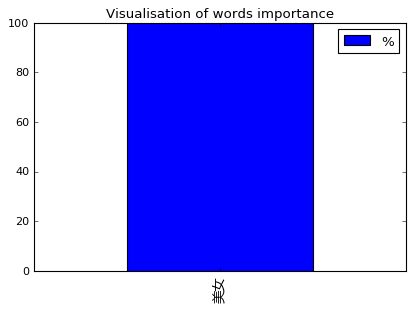

argmax_encode [[ 0.60395777  0.65418601  0.70099568  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.60395777, 0.65418601, 0.70099568] 1.95914 3
帅哥戴墨镜


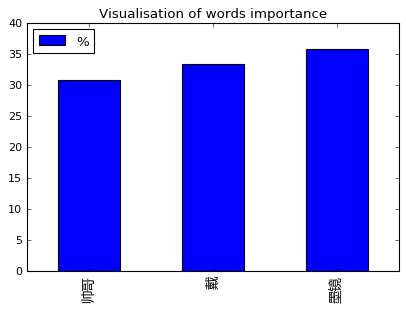

argmax_encode [[ 0.44876021  0.53418797  0.57284641  0.4709844   0.39264441  0.53650707
   0.58394921  0.47135696  0.52906352  0.58394921  0.56001371  0.51372951
   0.58394921  0.44146597  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.44876021, 0.53418797, 0.57284641, 0.4709844, 0.39264441, 0.53650707, 0.58394921, 0.47135696, 0.52906352, 0.58394921, 0.56001371, 0.51372951, 0.58394921, 0.44146597] 7.22341 14
初中孩子的免费精品课，用手机，在家上，省心


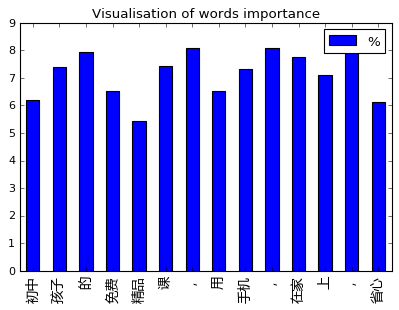

argmax_encode [[ 0.49650368  0.51639628  0.52368057  0.56346333  0.45872629  0.66212064
   0.56528509  0.5727976   0.46991751  0.43030149  0.4625442   0.50973749
   0.45903343  0.66212064  0.44086152  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.49650368, 0.51639628, 0.52368057, 0.56346333, 0.45872629, 0.66212064, 0.56528509, 0.5727976, 0.46991751, 0.43030149, 0.4625442, 0.50973749, 0.45903343, 0.66212064, 0.44086152] 7.79349 15
好用颜值高才是王道，这些手机现在买才实惠


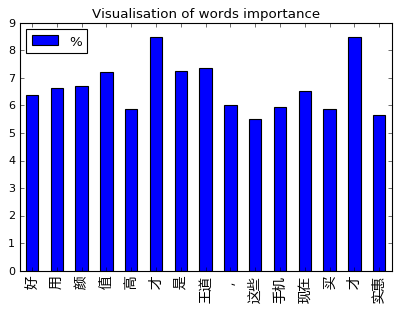

In [11]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

argmax_encode [[ 0.45069715  0.65488756  0.61330211  0.51891261  0.42063296  0.47437555
   0.41983348  0.39982572  0.68476462  0.6092326   0.48914993  0.6016382
   0.45957309  0.36869937  0.48716903  0.58317816  0.62644577  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.45069715, 0.65488756, 0.61330211, 0.51891261, 0.42063296, 0.47437555, 0.41983348, 0.39982572, 0.68476462, 0.6092326, 0.48914993, 0.6016382, 0.45957309, 0.36869937, 0.48716903, 0.58317816, 0.62644577] 8.86232 17
比信用卡

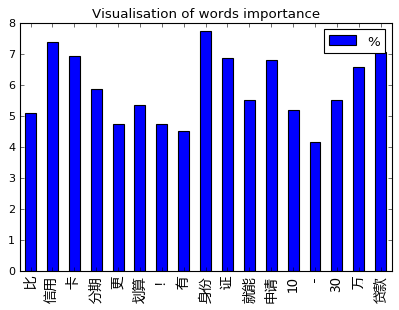

argmax_encode [[ 0.42114472  0.47981906  0.49798566  0.47732309  0.58189088  0.47641703
   0.5098294   0.50207222  0.48548496  0.53001857  0.47636509  0.50680113
   0.47918487  0.49323291  0.4702777   0.48948741  0.51126403  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.42114472, 0.47981906, 0.49798566, 0.47732309, 0.58189088, 0.47641703, 0.5098294, 0.50207222, 0.48548496, 0.53001857, 0.47636509, 0.50680113, 0.47918487, 0.49323291, 0.4702777, 0.48948741, 0.51126403] 8.3886 17
1890元往返飞旧金

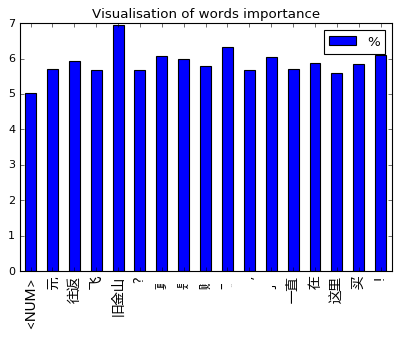

argmax_encode [[ 0.5112263   0.56561488  0.54593873  0.63990295  0.61351508  0.44717774
   0.57618612  0.51971185  0.61608189  0.60302985  0.55051273  0.37947482
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.5112263, 0.56561488, 0.54593873, 0.63990295, 0.61351508, 0.44717774, 0.57618612, 0.51971185, 0.61608189, 0.60302985, 0.55051273, 0.37947482] 6.56837 12
这才是上班族修本科的正确打开方式！


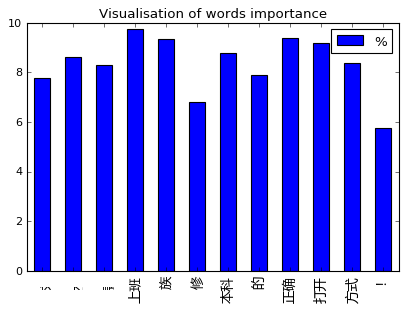

In [12]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

argmax_encode [[ 0.43101716  0.46051294  0.39616111  0.50243288  0.43855834  0.52843726
   0.4705947   0.3973926   0.39712018  0.42289764  0.51758146  0.46130759
   0.53946316  0.52812755  0.49521106  0.50110286  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.43101716, 0.46051294, 0.39616111, 0.50243288, 0.43855834, 0.52843726, 0.4705947, 0.3973926, 0.39712018, 0.42289764, 0.51758146, 0.46130759, 0.53946316, 0.52812755, 0.49521106, 0.50110286] 7.48792 16
国庆到成都不要住酒店啦,这些民

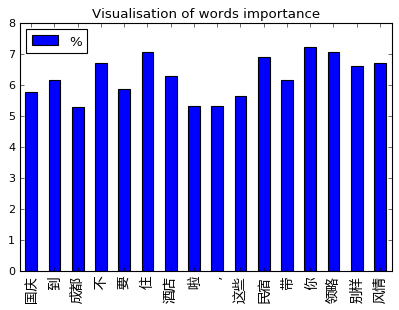

argmax_encode [[ 0.80206776  0.53299999  0.46180871  0.40894899  0.53002107  0.51073277
   0.80206776  0.55027449  0.54724419  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.80206776, 0.53299999, 0.46180871, 0.40894899, 0.53002107, 0.51073277, 0.80206776, 0.55027449, 0.54724419] 5.14617 9
低头玩手机?不如低头学英语


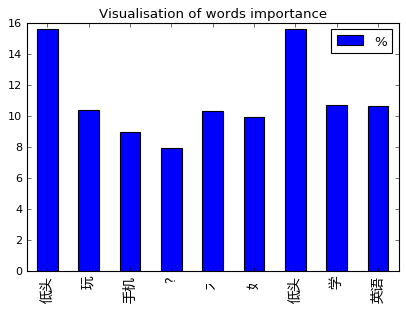

argmax_encode [[ 0.4455764   0.51595676  0.41457367  0.48676825  0.52460837  0.4978292
   0.48842594  0.3909713   0.50766075  0.53911579  0.46768367  0.46182957
   0.51595676  0.45611677  0.48832333  0.46946865  0.40914905  0.3938961
   0.3664279   0.36685079  0.48331988  0.43507588  0.53911579  0.48395616
   0.39907703  0.50198483  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
[6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.4455764, 0.51595676, 0.41457367, 0.48676825, 0.52460837, 0.4978292, 0.48842594, 0.3909713, 0.50766075, 0.53911579, 0.46768367, 0.46182957, 0.51595676, 0.45611677, 0.48832333, 0.46946865,

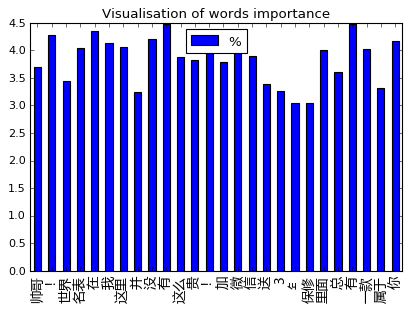

argmax_encode [[ 0.36622232  0.58206964  0.45982707  0.47711247  0.45982707  0.65497708
   0.43863544  0.42276567  0.64262092  0.38334912  0.44969636  0.6212821
   0.4127602   0.41924953  0.4109906   0.65497708  0.44455272  0.55795622
   0.39801443  0.61041266  0.64262092  0.49016908  0.45435011  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.36622232, 0.58206964, 0.45982707, 0.47711247, 0.45982707, 0.65497708, 0.43863544, 0.42276567, 0.64262092, 0.38334912, 0.44969636, 0.6212821, 0.4127602, 0.41924953, 0.4109906, 0.65497708, 0.444552

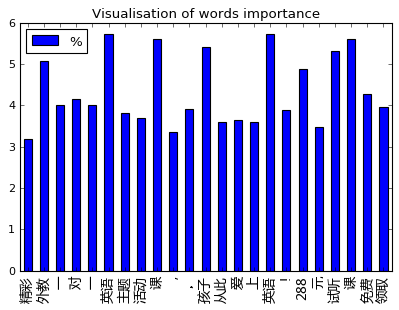

In [13]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

argmax_encode [[ 0.52044368  0.45097744  0.60529077  0.4190917   0.49042955  0.50451869
   0.60529077  0.47442824  0.52096498  0.51130509  0.4178783   0.4287118
   0.41354039  0.40360659  0.50302505  0.54342735  0.48079145  0.45862204
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.52044368, 0.45097744, 0.60529077, 0.4190917, 0.49042955, 0.50451869, 0.60529077, 0.47442824, 0.52096498, 0.51130509, 0.4178783, 0.4287118, 0.41354039, 0.40360659, 0.50302505, 0.54342735, 0.48079145, 0.45862204]

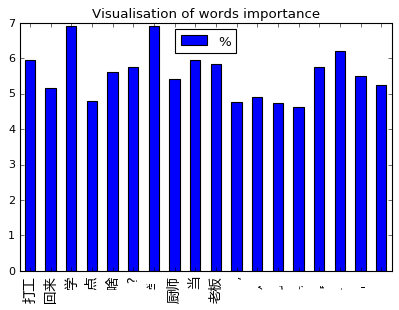

argmax_encode [[ 0.52349424  0.6255185   0.50114405  0.56064427  0.55306363  0.52542353
   0.50114405  0.68866682  0.68826705  0.59931839  0.5068481   0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.52349424, 0.6255185, 0.50114405, 0.56064427, 0.55306363, 0.52542353, 0.50114405, 0.68866682, 0.68826705, 0.59931839, 0.5068481] 6.27353 11
水饺加盟,无需厨师,总部扶持创业!


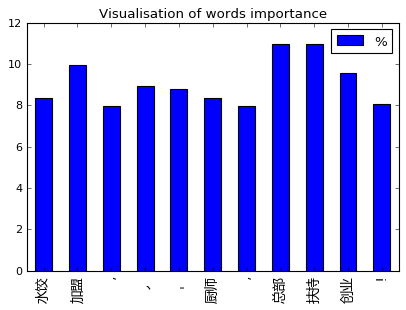

argmax_encode [[ 0.5338527   0.63097721  0.47613269  0.56881595  0.55276489  0.53218073
   0.47613269  0.69910026  0.69831938  0.59428769  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.5338527, 0.63097721, 0.47613269, 0.56881595, 0.55276489, 0.53218073, 0.47613269, 0.69910026, 0.69831938, 0.59428769] 5.76256 10
水饺加盟,无需厨师,总部扶持创业


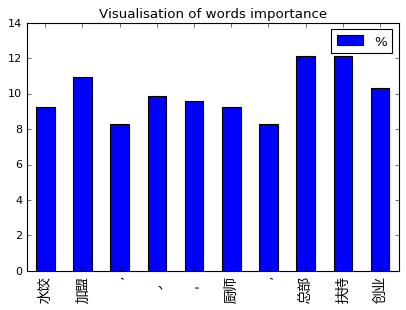

In [14]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

argmax_encode [[ 0.55630535  0.60771799  0.54267722  0.44089255  0.47853717  0.53443331
   0.47649133  0.50785959  0.45278549  0.36814898  0.51805782  0.44452342
   0.40173632  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.55630535, 0.60771799, 0.54267722, 0.44089255, 0.47853717, 0.53443331, 0.47649133, 0.50785959, 0.45278549, 0.36814898, 0.51805782, 0.44452342, 0.40173632] 6.33017 13
iPhone隐藏功能：高铁也能在线选座了！


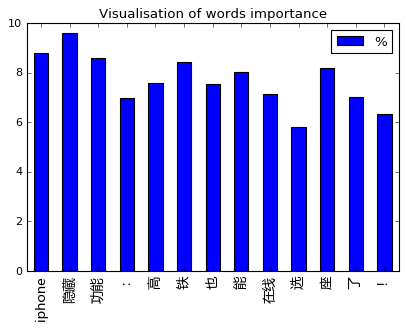

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [16]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.55630529]


array([ 0.55630529], dtype=float32)

In [17]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.63497221]


array([ 0.63497221], dtype=float32)

In [18]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '选座')

[ 0.58009535]


array([ 0.58009535], dtype=float32)

In [19]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.74276674]


array([ 0.74276674], dtype=float32)

argmax_encode [[ 0.45489281  0.50182086  0.50620574  0.62124288  0.5809623   0.41846341
   0.576226    0.46467063  0.45293891  0.46204039  0.41846341  0.41831303
   0.50510585  0.40984368  0.38599306  0.62124288  0.42330185  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.45489281, 0.50182086, 0.50620574, 0.62124288, 0.5809623, 0.41846341, 0.576226, 0.46467063, 0.45293891, 0.46204039, 0.41846341, 0.41831303, 0.50510585, 0.40984368, 0.38599306, 0.62124288, 0.42330185] 8.22173 

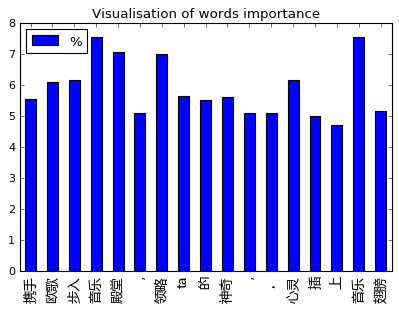

In [20]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

argmax_encode [[ 0.57100576  0.60835576  0.46991947  0.54964495  0.51912439  0.55088711
   0.36832088  0.52543938  0.4164927   0.52543938  0.60835576  0.55088711
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.57100576, 0.60835576, 0.46991947, 0.54964495, 0.51912439, 0.55088711, 0.36832088, 0.52543938, 0.4164927, 0.52543938, 0.60835576, 0.55088711] 6.26387 12
巨人游泳五星级酒店培训,一对一游泳培训


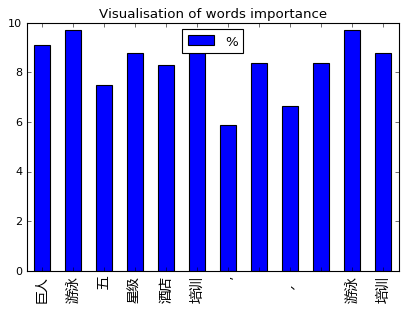

In [21]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

argmax_encode [[ 0.50036037  0.48728043  0.57440853  0.47583401  0.52395993  0.5110805
   0.49170676  0.53838581  0.46702158  0.52197087  0.49420577  0.5052703
   0.49771398  0.48481795  0.50417936  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.50036037, 0.48728043, 0.57440853, 0.47583401, 0.52395993, 0.5110805, 0.49170676, 0.53838581, 0.46702158, 0.52197087, 0.49420577, 0.5052703, 0.49771398, 0.48481795, 0.50417936] 7.5782 15
往返飞旧金山?真是赚了,我一直在这里买!


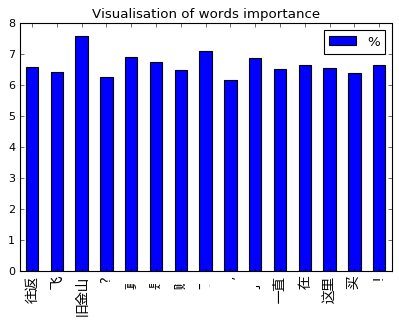

In [22]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

argmax_encode [[ 0.53033471  0.48352692  0.61040115  0.55018109  0.45714962  0.52955323
   0.56015122  0.62005627  0.50769496  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.53033471, 0.48352692, 0.61040115, 0.55018109, 0.45714962, 0.52955323, 0.56015122, 0.62005627, 0.50769496] 4.84905 9
不要住酒店，这里的民宿好


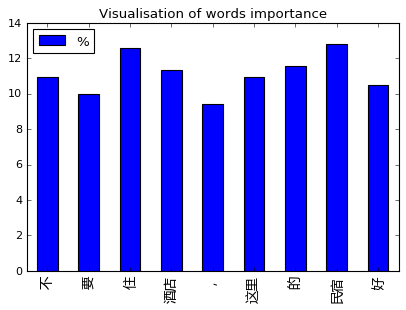

In [23]:
predict('不要住酒店，这里的民宿好')

argmax_encode [[ 0.53033471  0.48352692  0.61040115  0.62005627  0.4571496   0.52955329
   0.56015122  0.55018109  0.50769496  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.53033471, 0.48352692, 0.61040115, 0.62005627, 0.4571496, 0.52955329, 0.56015122, 0.55018109, 0.50769496] 4.84905 9
不要住民宿，这里的酒店好


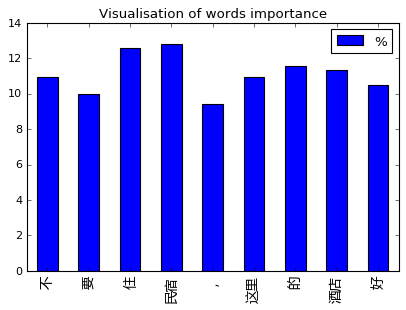

In [24]:
predict('不要住民宿，这里的酒店好')

argmax_encode [[ 0.48300099  0.51451433  0.47533965  0.3582235   0.57820547  0.45309544
   0.4226709   0.48290503  0.37565374  0.61985451  0.47799915  0.45309544
   0.4611752   0.4355014   0.4732779   0.46706265  0.46751752  0.61985451
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.48300099, 0.51451433, 0.47533965, 0.3582235, 0.57820547, 0.45309544, 0.4226709, 0.48290503, 0.37565374, 0.61985451, 0.47799915, 0.45309544, 0.4611752, 0.4355014, 0.4732779, 0.46706265, 0.46751752, 0.6198545

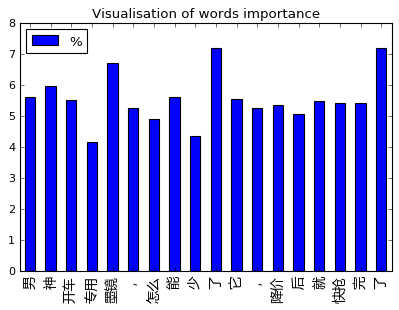

In [25]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

argmax_encode [[ 0.44955945  0.56545907  0.65727842  0.51425958  0.62621433  0.56400448
   0.43252712  0.36131525  0.38051343  0.45184082  0.50629032  0.56545907
   0.5516203   0.55491549  0.51835859  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[59, 5, 22092, 5705, 3781, 914, 326, 7, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.44955945, 0.56545907, 0.65727842, 0.51425958, 0.62621433, 0.56400448, 0.43252712, 0.36131525, 0.38051343, 0.45184082, 0.50629032, 0.56545907, 0.5516203, 0.55491549, 0.51835859] 7.69962 15
我的家乡惠州越来越热,选一款喜欢的墨镜很重要


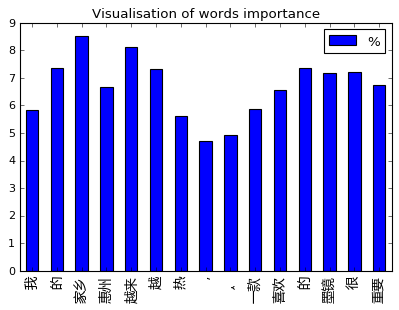

In [26]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

In [27]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.8808586]


array([ 0.8808586], dtype=float32)

In [28]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.86037838]


array([ 0.86037838], dtype=float32)

In [29]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.86037844]


array([ 0.86037844], dtype=float32)

In [30]:
top_words('往返')

往返:1.000000 套票:0.579930 单程:0.534903 拱:0.529547 5288:0.516028 1900:0.497173 华盛顿:0.458171 旧金山:0.446032 亚太:0.426531 曼谷:0.417338 488:0.413925 770:0.411715 1080:0.409647 清迈:0.406587 飞:0.403747 1350:0.401432 出团:0.387928 洋服:0.385856 芭提雅:0.372313 想飞:0.367218 多次:0.365501 龙眼:0.363985 hkd:0.361862 国航:0.359379 路费:0.359155 萝岗:0.359135 洛杉矶:0.351214 新山:0.344900 报销:0.344804 833:0.344674 春树:0.343799 嘉盛达:0.342666 行程:0.339987 求教:0.332156 青旅:0.332143 爬坡:0.332025 错峰:0.331135 桌子:0.330303 独享:0.329588 人头:0.328492 办妥:0.328192 双高:0.328071 文度:0.327684 出境:0.327355 航线:0.324844 特此:0.324519 路易斯:0.324232 布吉:0.323810 e代:0.323349 免交:0.323003 50m:0.322153 出发:0.319156 机票:0.319040 388:0.318060 到处:0.316626 名古屋:0.316199 浮漂:0.315936 聚餐:0.315052 开怀:0.314784 杨浦:0.314700 吉隆坡:0.314639 抢点:0.314434 迪斯尼:0.314399 投产:0.314365 中青旅:0.314286 结伴:0.314233 自发:0.313928 478:0.313681 华同:0.313082 1599:0.312914 游:0.312528 直飞:0.312321 春节:0.310516 新加坡:0.308991 割草:0.308778 便宜:0.308085 阿凡达:0.307641 一年制:0.306592 全境:0.306215 斐:0.305407 暑:0.305157 南湖:

In [31]:
top_words('民宿')

民宿:1.000000 收买:0.519090 客栈:0.496776 旅馆:0.454656 大鹏:0.439593 尾盘:0.388151 蹿:0.379266 房产:0.372412 连绵:0.367334 牌局:0.367064 大局:0.364205 景美:0.364074 景色:0.363371 温情:0.355784 格雷斯:0.355536 订房:0.355208 开往:0.354507 奇妙:0.354050 比基尼:0.353786 赞:0.348932 乐趣:0.346259 盛景:0.343713 日本:0.342155 昧:0.342011 活现:0.341501 鎏:0.340273 须臾:0.338636 御园:0.337142 海豚:0.336272 骑车:0.334708 身临:0.334564 竟能:0.332319 峡湾:0.331870 浮潜:0.331614 苍穹:0.331465 活灵:0.331075 游神:0.329888 诗情:0.329322 能说:0.329060 歇:0.328442 祝贺:0.328250 暖冬:0.328055 此时:0.327217 拉升:0.327162 大阪:0.326779 尾:0.326053 氏彩:0.325780 撩人:0.325072 肥肠:0.324013 公寓:0.323786 酥:0.323592 一隅:0.323087 梵高:0.322524 执掌:0.321908 效劳:0.320708 糊涂:0.319530 荷尔蒙:0.319100 住:0.319077 穿梭:0.318342 人美:0.318092 田野:0.317812 抠:0.317653 4699:0.316965 判:0.316842 酒店:0.316214 身影:0.316071 矩:0.315380 淡雅:0.314668 景象:0.314598 生出:0.314269 边陲:0.314101 酷爽:0.313373 西昌:0.313263 羞:0.313146 大境:0.313055 静谧:0.312727 听命:0.312316 比邻:0.312024 爱优:0.311851 赏樱:0.311383 遨游:0.311208 太热:0.311198 极地:0.311044 塞班:0.310738

In [32]:
top_words('酒店')

酒店:1.000000 布草:0.518598 情侣:0.516169 开张:0.445827 同里:0.444872 三大:0.442523 糊涂:0.416827 格雷斯:0.409828 浪漫:0.409136 布置:0.399517 喜来登:0.398361 客房:0.393390 景色:0.386394 蓝调:0.386032 宾馆:0.385052 气氛:0.375630 胜景:0.375287 干净:0.374330 订房:0.368822 赛贝:0.367022 雅诗阁:0.361054 凯悦:0.360847 红专:0.360158 造物:0.357876 汾阳:0.355929 阳春:0.354968 携程:0.354735 雁栖:0.354461 古兰:0.351092 杂物:0.350037 小鸣:0.349404 计价:0.346297 混迹:0.345645 拱:0.345380 宏伟:0.345298 极小:0.344650 浮潜:0.343485 省钱:0.343037 旅馆:0.338636 水疗:0.337795 药典:0.337789 舒舒:0.337217 厨房:0.336819 夏威夷:0.335840 平角:0.334702 斗拱:0.333699 爱恩:0.333229 大阪:0.333221 风向:0.331565 wedding:0.330391 置顶:0.330320 醒悟:0.329918 遍及:0.329909 预订:0.329871 会所:0.327932 cott:0.327761 穹:0.327606 游游:0.327546 水床:0.327290 花好:0.326661 白鹭:0.326547 幡然:0.324603 玛卡:0.324229 诱导:0.324191 熨:0.324048 墨尔本:0.324039 桌布:0.323436 牛气:0.323347 大厅:0.322290 机票:0.321393 踏春:0.321196 涠:0.321163 mpv:0.320764 moba:0.320165 温水:0.320152 roi:0.320093 提案:0.319826 阑:0.319660 菜:0.319278 单体:0.318279 合利:0.318001 5c:0.317393 越岭:0.3

In [33]:
top_words('旧金山')

旧金山:1.000000 情迷:0.624571 加州:0.570537 峡谷:0.545887 华盛顿:0.527908 美西:0.468220 邻近:0.461178 往返:0.446032 单程:0.439851 小人儿:0.426531 出团:0.422549 饱览:0.422114 拱:0.421742 山野:0.421593 播撒:0.421328 84:0.421309 漫游:0.420401 770:0.420324 套票:0.417891 1900:0.414341 布吉:0.414267 运河:0.412772 电镜:0.411100 百亩:0.410474 1160:0.410473 波澜:0.405862 包天:0.402870 488:0.401703 5288:0.401544 niton:0.400073 尼玛:0.399565 温水:0.399438 总统:0.398788 chk:0.397494 请假:0.394605 嘉汇:0.394501 nom:0.393147 苯基:0.390845 二月:0.389727 想飞:0.387816 宅急送:0.387774 彼岸:0.385401 新山:0.384420 新塘:0.384287 领秀:0.383785 冲天:0.383503 曼谷:0.382576 湿地:0.381665 32g:0.380013 大考:0.379204 洋服:0.379023 穷游:0.378338 洛杉矶:0.378235 海天:0.377122 64g:0.376919 神舟:0.376866 六星:0.375612 浮漂:0.375368 欠款:0.375208 土耳其:0.374518 3588:0.372983 暑期:0.372867 豪爽:0.372687 龙眼:0.372660 设立:0.371173 雄峰:0.371094 白鸽:0.370457 rp:0.369378 水乡:0.367798 sssss:0.367642 天宫:0.367558 贝尔利:0.367441 返销:0.367375 10g:0.367155 phe:0.365874 九十九:0.365735 代订:0.365501 助推:0.365367 橋:0.364722 1080:0.364689 127:0.3638

In [34]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

家乡:0.657278 越来:0.626214 狙:0.585081 纷:0.568011 媳:0.565642 的:0.565459 越:0.564004 罕:0.562910 殖:0.561442 很:0.554915 和兴:0.553916 墨镜:0.551620 卖酒:0.547273 越理:0.547023 斥:0.543154 访:0.542095 秧:0.537817 想说:0.533632 漠:0.531238 粑:0.530533 怕冷:0.529220 money:0.528758 浓密:0.527583 烛:0.525054 畜:0.524253 扁:0.524102 惯:0.522787 透漏:0.520139 会社:0.518961 倩:0.518631 重要:0.518359 总长:0.516455 共存:0.515434 埋怨:0.515115 乐此:0.514860 惠州:0.514260 疯长:0.513681 268631:0.512997 蛤:0.512831 唉:0.510679 回调:0.510471 苍:0.510373 <S>:0.509885 祸首:0.509864 株式:0.509856 一瞥:0.509269 污垢:0.508329 老油条:0.507867 上位:0.507793 夸赞:0.506816 喜欢:0.506290 稀少:0.502933 达令:0.501997 追到:0.501789 惊鸿:0.501546 艰难:0.501100 乖:0.500749 心结:0.500566 人际:0.500355 看待:0.499803 古风:0.499621 出卖:0.499608 禽:0.499607 荼明:0.498301 慌张:0.498125 溯:0.497059 麽:0.496870 淤:0.496723 辐:0.495980 博佳:0.495371 寡:0.495153 少见:0.493273 饥:0.492403 乱成:0.491936 越好:0.491475 埠:0.491089 卡卡:0.490251 雅美娜来:0.489755 竟会:0.489730 比高:0.489361 上进:0.488931 坦白:0.488475 谅:0.487806 对待:0.486937 匙:0.486346 膝

In [35]:
top_words('眼镜')

眼镜:1.000000 出汗:0.615034 防滑:0.567904 滑落:0.487932 极轻:0.452711 狂甩:0.439085 loho:0.418304 配戴:0.406824 镜片:0.406278 吸油:0.402152 滑:0.400956 转给:0.399096 乐友:0.388018 依视路:0.384666 打球:0.384539 框:0.382111 斜纹:0.380894 配:0.377214 内测:0.376520 狙:0.372880 分手:0.367353 sooi:0.361132 滢:0.359664 摘掉:0.355143 索爱:0.355052 流汗:0.353046 辩:0.349510 挨宰:0.348299 交往:0.346054 胸:0.344150 工字钢:0.343718 再见:0.343186 甩:0.342273 人际:0.337614 弱视:0.337099 木纹:0.336524 迷恋:0.333893 绽:0.333678 一盒:0.332516 向右:0.332383 近视:0.331902 奈特:0.331603 凯信:0.331517 划痕:0.329641 拷:0.329152 郑重:0.329068 信诺:0.328899 节食:0.327847 罕:0.327809 温和:0.326493 镜架:0.325465 莱珀妮:0.325172 扯:0.324915 裕华:0.324328 抱怨:0.324026 379:0.324019 烛:0.323421 过节:0.322559 总长:0.321911 笆:0.321707 鞭:0.321478 配镜:0.321343 瞳:0.320807 牙签:0.320675 祸首:0.320305 可得:0.319951 上九:0.319896 减脂:0.319505 妹:0.319272 雅美娜来:0.318176 动:0.316953 关闭:0.316934 轻装:0.316920 步道:0.316849 期间:0.316692 海龟:0.315802 多美:0.315650 明眸:0.314700 衷:0.314638 大势:0.314611 蛀:0.314234 小费:0.314229 售假:0.313975 轻质:0.313490 女友

In [36]:
top_words('nike')

nike:1.000000 耐克:0.637358 com:0.449790 tescom:0.444877 air:0.429680 陵园:0.426477 倩:0.424344 烈士:0.419472 徕卡:0.416602 香蜜湖:0.409345 正品:0.407977 东丽:0.403192 平利:0.395431 www:0.393054 luna:0.391920 陶氏:0.391758 礼乐:0.391264 美能达:0.387843 纳美:0.385211 benro:0.380821 凡客:0.380634 柯尼卡:0.379185 断路:0.373713 gia:0.373690 du:0.372607 诗书:0.371955 箱柜:0.371899 药典:0.371338 绝色:0.369951 fifa:0.368519 美合:0.367630 达令:0.366788 买比:0.366717 tfo:0.364674 授权:0.364452 schultz:0.361971 1309:0.361674 华人:0.360345 皙:0.359685 崩:0.358854 绞股蓝:0.358664 子墨:0.358184 百诺:0.356718 盔:0.356312 studio:0.355673 lkk:0.355358 惠达:0.354471 春夏:0.354224 主办:0.354078 club:0.353915 套票:0.353787 贿:0.353098 nano:0.352268 振雄:0.350658 鞭:0.350082 artiz:0.349876 托业:0.349036 cherry:0.347560 罗格朗:0.347511 drop:0.346534 富硒:0.344290 pmi:0.344204 aj:0.343863 麦卡仑:0.343626 裕金:0.343539 上九:0.342696 mcc:0.342453 一千多:0.342028 洗护:0.341998 手环:0.341839 阿慕施:0.341330 别样:0.340289 柱式:0.339270 龍:0.338288 中车:0.338043 好思家:0.337850 box:0.337674 dw:0.337179 三思:0.336345 咨:0.

In [37]:
top_words('耐克')

耐克:1.000000 nike:0.637358 阿迪:0.536318 倩:0.448192 三双:0.440141 宁花:0.422166 太早:0.414688 邓禄普:0.397486 bv:0.392047 专柜:0.385161 办完:0.379951 正品:0.364777 名表:0.360030 弈:0.359543 百多:0.352995 当铺:0.351471 逛:0.349834 tescom:0.348912 nas:0.347549 达令:0.344645 赌场:0.342910 斥:0.342246 ago:0.338910 cucci:0.338530 网页:0.336618 还花:0.336533 罗格朗:0.335563 rp:0.335194 三叶:0.334995 亚泰:0.334668 她说:0.334486 解谜:0.333364 易观:0.333265 lkk:0.330955 罕:0.330709 天壤:0.329219 发话:0.328353 抢到:0.328182 劳力:0.327965 aj:0.326913 齤:0.326645 授权:0.326263 da:0.324888 7500:0.324819 waki:0.323659 崩:0.323500 296:0.323473 169:0.323251 大牌:0.323180 花几:0.322912 卡丽:0.322757 松软:0.322430 同庆:0.320407 拦住:0.320007 双边:0.318272 华坤:0.317879 康奈尔:0.317610 正版:0.317311 一两百:0.317122 便宜:0.316424 ugg:0.315821 礼乐:0.315734 干花:0.315407 同里:0.315406 红树:0.315023 麽:0.315016 肥胖:0.314993 中青旅:0.314927 月季:0.314768 金面:0.314734 du:0.314268 供电:0.313954 临平:0.313617 纳美:0.313616 白菜:0.313337 精力:0.313150 终于:0.312757 高傲:0.312508 碳酸铜:0.312175 京基:0.311351 裕金:0.310298 拉带:0.310257

In [38]:
top_words('沧州')

沧州:1.000000 周口:0.515916 阜新:0.510932 内江:0.507065 泸州:0.497690 南阳:0.495804 海口:0.492439 呼和浩特:0.492038 信阳:0.489146 台州:0.487512 嘉兴:0.486894 赣州:0.486637 泰州:0.485843 文山:0.482302 保定:0.474340 宝鸡:0.470730 本溪:0.470588 济南:0.464824 青岛:0.460966 延边:0.459991 德阳:0.459787 鑫宜达:0.456611 河源:0.456310 福州:0.453027 潍坊:0.452789 衢州:0.443513 兴安:0.440758 哈尔滨:0.431471 无锡:0.429148 汕尾:0.428888 抚顺:0.423195 桩基:0.422385 锦州:0.421661 十堰:0.420476 眉山:0.420017 镇江:0.416172 宁波:0.415611 自贡:0.414664 许昌:0.408797 廊坊:0.408551 湛江:0.407383 南宁:0.406608 乌鲁木齐:0.403050 菏泽:0.401899 重庆:0.401706 南充:0.399504 商丘:0.398768 佛山:0.398010 包头:0.396928 张家界:0.395838 昭通:0.394723 邢台:0.393090 贺州:0.391790 鞍山:0.389935 滨州:0.389475 达沃斯:0.388249 铁岭:0.387829 烟台:0.386993 聊城:0.386449 仙桃:0.385518 开封:0.384432 常州:0.384356 昆明:0.382953 徐州:0.382934 大连:0.381379 西宁:0.381140 盐城:0.379972 抚州:0.379756 温州:0.379430 葫芦:0.377555 东莞:0.375864 南昌:0.375809 天津:0.375393 齐齐哈尔:0.373064 临夏:0.371964 绵阳:0.370834 长春:0.368722 軒:0.366090 济宁:0.364220 岛:0.363065 黔:0.362034 三门峡:0.361652 运城:0.358

In [39]:
top_words('电视')

电视:1.000000 液晶:0.537134 kuset:0.493458 彩电:0.485050 广播:0.465853 did:0.397919 拆机:0.395873 拼接:0.384253 这般:0.384236 斯斐德:0.380085 荧:0.377590 lg:0.363939 天线:0.361446 原著:0.359927 剧:0.359877 江民:0.357236 盒子:0.354494 worth:0.350861 步频:0.344683 寰:0.342210 浩宇:0.340605 冰箱:0.337237 tvc:0.336829 毛衫:0.336690 lkk:0.334256 吹膜:0.333837 tv:0.327816 赛鸽:0.325302 旷世:0.325151 媒体:0.325136 hdr:0.324505 市区:0.324380 菲尼特:0.322749 暨大:0.322070 屏:0.321772 机顶:0.321052 高金:0.320408 盛华:0.320358 天笔:0.320192 华强北:0.319871 画院:0.319519 萤火:0.319230 立马:0.316728 一趟:0.316219 水井:0.316049 好再来:0.315193 phone:0.314812 高清:0.314764 v8:0.314631 ued:0.314474 热播:0.312113 发问:0.311203 视:0.310261 那样:0.309829 矩:0.309705 sql:0.309649 抢滩:0.309436 欧科亚:0.308993 诺米:0.308856 潜藏:0.308161 圆锯:0.308008 飞飞:0.307921 敞:0.307835 wdp:0.307431 剧组:0.307136 酉:0.306161 if:0.306065 包团:0.305448 ol:0.305387 显示:0.305381 携带:0.304995 吵:0.304907 开箱:0.304734 邮电:0.304713 青草:0.304685 碁:0.303985 深大:0.303827 旺龙:0.303785 书房:0.303731 科曼尼:0.303460 储值:0.303439 抢答:0.302591 玟:0.

In [40]:
top_words('帅哥')

帅哥:1.000000 一边:0.400962 结识:0.392197 包围:0.386534 内向:0.383343 新思路:0.383256 睡着:0.379363 益德:0.377526 骨骼:0.374962 惊奇:0.366646 果酒:0.359402 郫县:0.358985 黄皮:0.356604 兴许:0.356020 空姐:0.354040 小说:0.351644 瞎眼:0.351377 闯过:0.348458 单身:0.347241 脾气:0.345184 豆瓣:0.342849 美女:0.342786 收收:0.337821 sdgo:0.336815 表妹:0.335617 白熊:0.335588 寻梦:0.335444 甚:0.335025 审问:0.334743 怂:0.334606 熄灯:0.333396 网吧:0.332991 推手:0.332045 眼馋:0.331506 窥探:0.330799 500mb:0.330198 雪城:0.329775 小哥:0.329587 乐此:0.329323 解谜:0.329226 蜀国:0.327117 娇羞:0.326979 听懂:0.326713 相投:0.325621 咬:0.325266 地网:0.324428 羞:0.324426 寻爱:0.324359 来说:0.323937 独处:0.323575 证卡:0.321624 辣妹:0.321589 多迪:0.321422 凶残:0.320874 放纵:0.319793 同人:0.319482 阵地:0.318291 达喀尔:0.317949 踢:0.317879 速率:0.317607 喘气:0.317430 麽:0.317120 于禁:0.316683 傻眼:0.315973 日剧:0.315331 甲虫:0.314152 物价:0.313965 主公:0.313865 符:0.313356 追忆:0.312696 乖:0.311794 招呼:0.311390 吓呆:0.311042 消遣:0.310350 乖乖:0.310239 弹头:0.309728 星驰:0.309634 昧:0.309604 车公:0.309370 震撼:0.309319 离家:0.309244 炮火:0.308562 撒娇:0.308230 馗:0.30

In [41]:
top_words('500块在这APP能买三双nike！还包邮！老婆夸我会省钱！')

三双:0.655989 鞋都:0.649676 罕:0.649285 倩:0.622662 怨:0.601323 斥:0.601004 达令:0.595164 夸赞:0.581632 殖:0.577013 亲眼:0.576304 小气:0.574942 ！:0.567946 狙:0.564882 老气:0.558351 松软:0.557720 这:0.557233 父亲:0.556554 太早:0.554673 拉卡拉:0.552069 已售:0.551201 坦白:0.550669 <S>:0.550074 综:0.549180 邮:0.548777 特地:0.547374 巡山:0.547292 cucci:0.544329 姑父:0.544244 血亏:0.543001 包:0.541898 高傲:0.541872 驶:0.541347 其余:0.541096 买:0.539984 之类:0.539618 还花:0.539512 她说:0.538761 多几:0.538687 傅:0.538058 夸:0.537271 一两百:0.536955 土气:0.536604 百多:0.536500 棕色:0.535656 邓禄普:0.534840 了:0.533807 脱皮:0.532732 上身:0.532231 师兄:0.531640 宁花:0.531031 巫师:0.529905 1445:0.528513 止损:0.527497 掠:0.527426 三百多:0.526804 得体:0.525756 共存:0.525748 卓极:0.525321 aj:0.525205 傻笑:0.524919 唉:0.523854 老土:0.523662 1gb:0.523553 盖子:0.522683 价款:0.521981 剜:0.521499 </S>:0.520920 原单:0.520867 中毒:0.519101 举动:0.518155 169:0.518135 禽:0.517896 烛:0.517719 流露:0.517640 格子:0.516570 私信:0.515988 殴:0.515675 多花:0.515492 太刀:0.514866 预告:0.514809 淤:0.514794 毛皮:0.514714 解谜:0.514579 睡着:0.513979 s

In [42]:
top_words('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

三双:0.655989 鞋都:0.649676 罕:0.649285 倩:0.622662 怨:0.601323 斥:0.601004 达令:0.595164 夸赞:0.581632 殖:0.577013 亲眼:0.576304 小气:0.574942 ！:0.567946 狙:0.564882 老气:0.558351 松软:0.557720 这:0.557233 父亲:0.556554 太早:0.554673 拉卡拉:0.552069 已售:0.551201 坦白:0.550669 <S>:0.550074 综:0.549180 邮:0.548777 特地:0.547374 巡山:0.547292 cucci:0.544329 姑父:0.544244 血亏:0.543001 包:0.541898 高傲:0.541872 驶:0.541347 其余:0.541096 买:0.539984 之类:0.539618 还花:0.539512 她说:0.538761 多几:0.538687 傅:0.538058 夸:0.537271 一两百:0.536955 土气:0.536604 百多:0.536500 棕色:0.535656 邓禄普:0.534840 了:0.533807 脱皮:0.532732 上身:0.532231 师兄:0.531640 宁花:0.531031 巫师:0.529905 1445:0.528513 止损:0.527497 掠:0.527426 三百多:0.526804 得体:0.525756 共存:0.525748 卓极:0.525321 aj:0.525205 傻笑:0.524919 唉:0.523854 老土:0.523662 1gb:0.523553 盖子:0.522683 价款:0.521981 剜:0.521499 </S>:0.520920 原单:0.520867 中毒:0.519101 举动:0.518155 169:0.518135 禽:0.517896 烛:0.517719 流露:0.517640 格子:0.516570 私信:0.515988 殴:0.515675 多花:0.515492 太刀:0.514866 预告:0.514809 淤:0.514794 毛皮:0.514714 解谜:0.514579 睡着:0.513979 s

argmax_encode [[ 0.37644905  0.46726871  0.50514627  0.5572328   0.42439216  0.43677154
   0.53998399  0.65598923  0.46906593  0.56794566  0.49019018  0.54189795
   0.5487771   0.56794566  0.46899444  0.53727126  0.50027227  0.46588844
   0.44687593  0.56794566  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 9489, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.37644905, 0.46726871, 0.50514627, 0.5572328, 0.42439216, 0.43677154, 0.53998399, 0.65598923, 0.46906593, 0.56794566, 0.49019018, 0.54189795, 0.5487771, 0.56794566, 0.46899444, 0.53727126, 0.50027227, 0.46

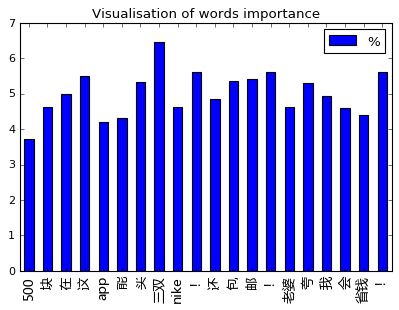

In [43]:
predict('500块在这APP能买三双NIKE！还包邮！老婆夸我会省钱！')

argmax_encode [[ 0.3850255   0.48505807  0.50641418  0.54544699  0.4268395   0.43101788
   0.5439347   0.66691405  0.52492142  0.56177092  0.48422039  0.53791177
   0.54737914  0.56177092  0.47367901  0.53765732  0.48819083  0.46434936
   0.4404864   0.56177092  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[1093, 520, 15, 14, 947, 52, 56, 11641, 8221, 6, 69, 66, 212, 6, 1601, 3111, 59, 103, 1144, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.3850255, 0.48505807, 0.50641418, 0.54544699, 0.4268395, 0.43101788, 0.5439347, 0.66691405, 0.52492142, 0.56177092, 0.48422039, 0.53791177, 0.54737914, 0.56177092, 0.47367901, 0.53765732, 0.48819083, 0.464

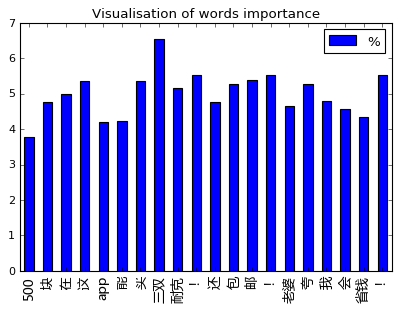

In [44]:
predict('500块在这APP能买三双耐克！还包邮！老婆夸我会省钱！')